# Classification-Process:

For this part of the procedure, several R packages need to be installed. Simply type in your R Console:

``` R
install.packages('BiocManager') # Prerequisite for M3C
BiocManager::install('M3C')

install.packages('NMF')
install.packages('gplots')
install.packages('ggsci')

```

For installing the R Kernel for Jupyter Notebooks and Jupyterlab, please follow these instructions:
https://irkernel.github.io/installation/

You can additionally to this script follow the instructions from https://bioconductor.org/packages/release/bioc/html/M3C.html on how to use the M3C package for yourself.

In [1]:
citation("M3C")


  John, C.R., Watson, D., Lewis, M. M3C: A Monte Carlo reference-based
  consensus clustering algorithm bioRxiv (2018): 377002

A BibTeX entry for LaTeX users is

  @Article{,
    title = {M3C: A Monte Carlo reference-based consensus clustering algorithm},
    author = {Christopher R. John and David Watson and Myles Lewis and Dominic Russ and Katriona Goldmann and Michael Ehrenstein and Costantino Pitzalis and Michael Barnes},
    year = {2018},
    journal = {bioRxiv},
    doi = {https://doi.org/10.1101/377002},
  }


In [2]:
library(M3C)
library(NMF)
library(gplots)
library(ggsci)

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [3]:
result <- read.csv('results/similarityMeasures/distance_results_readyForM3C_all.csv', header=TRUE, row.names=1)
result <- t(result)

***M3C***

method: Monte Carlo simulation

clustering algorithm: pam

annotation: none

running simulations...



  |======================================================================| 100%


done.

running consensus cluster algorithm for real data...

done.



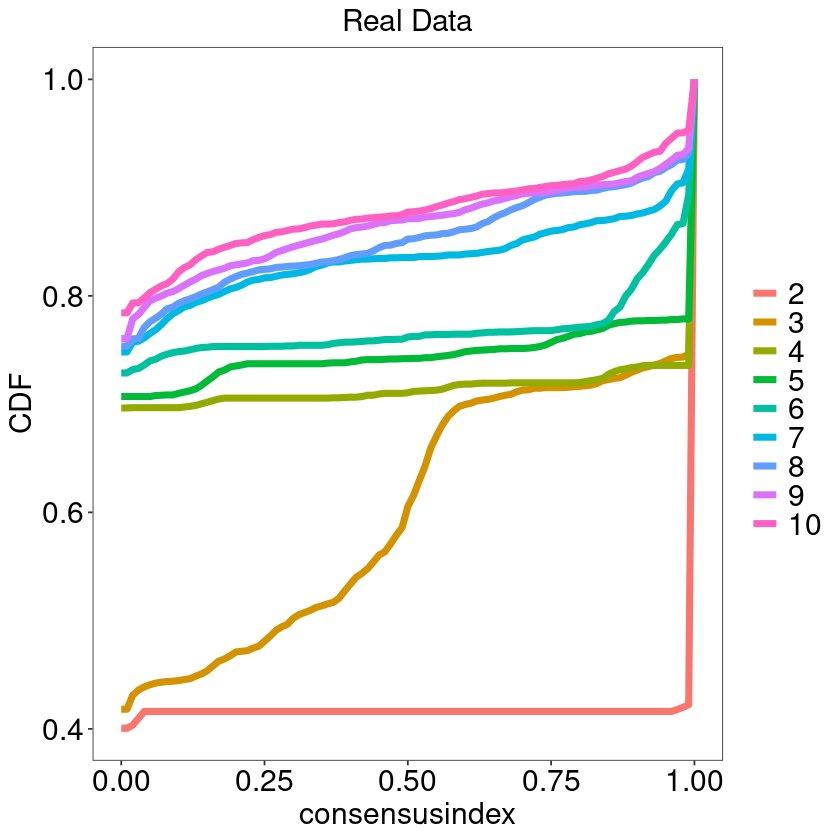

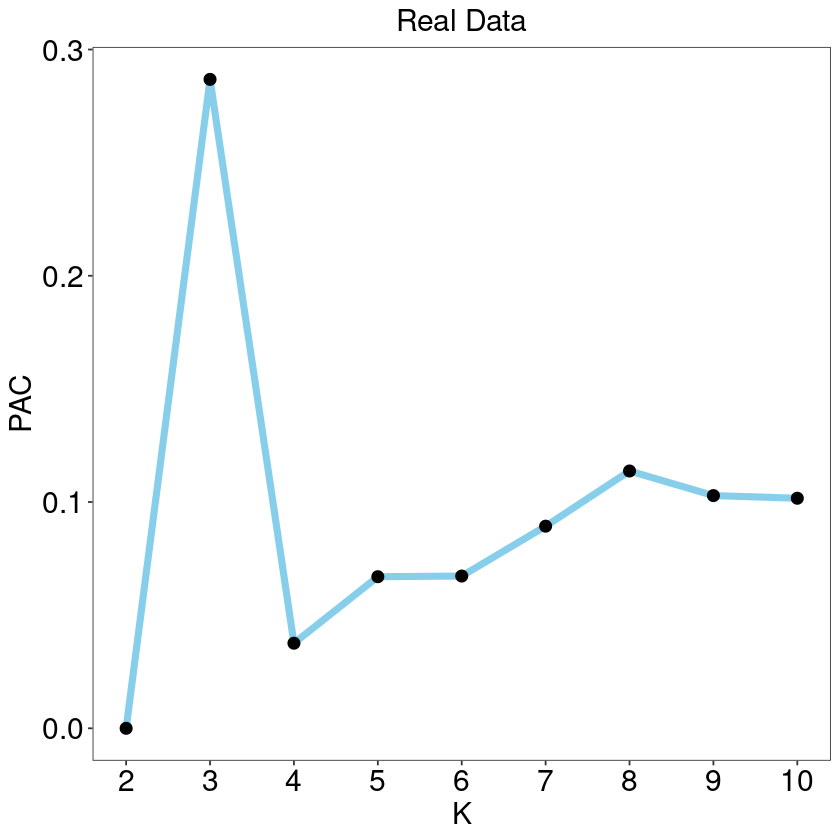

optimal K: 2



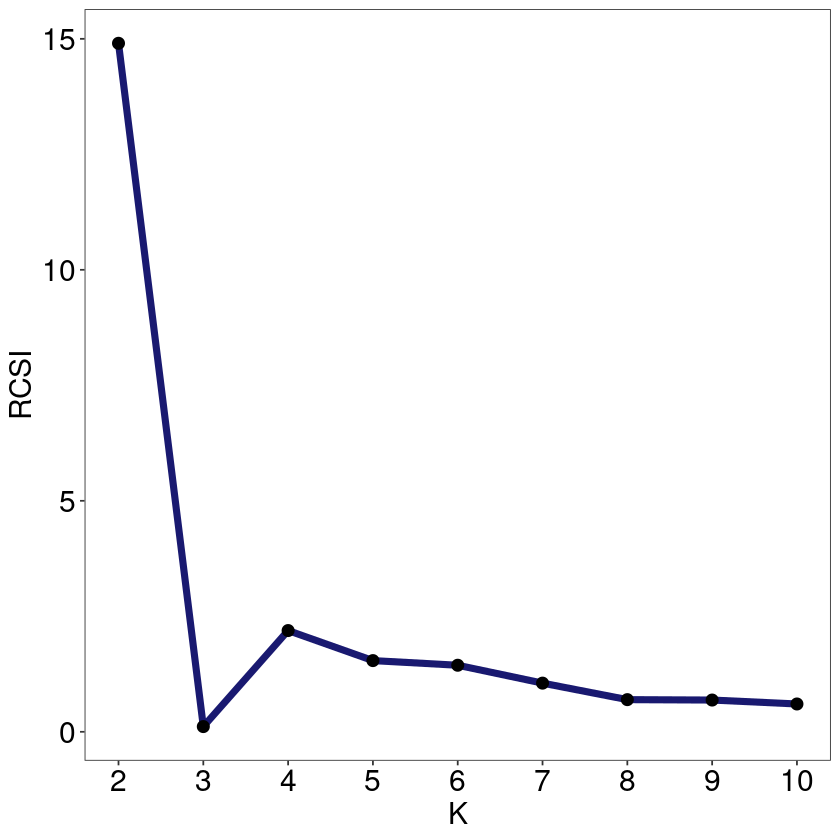

In [4]:
res <- M3C(result, cores=6, analysistype='kw', printres = FALSE, seed=666) # set printres = TRUE to save figures in the current directory

***t-SNE wrapper function***

running...

done.



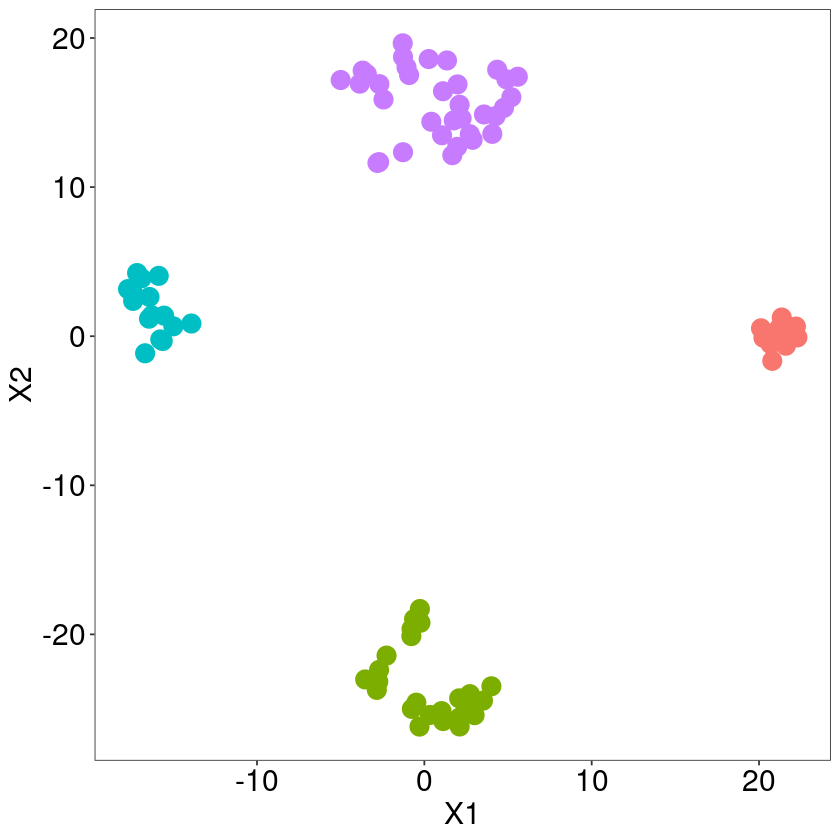

In [5]:
myK = 4
set.seed(666)

# for saving uncomment the line before and after the plotting code
#svg(filename="figures/tSNE_all_K2.svg")
tsne(res, K=myK, perplex=10)
#dev.off()

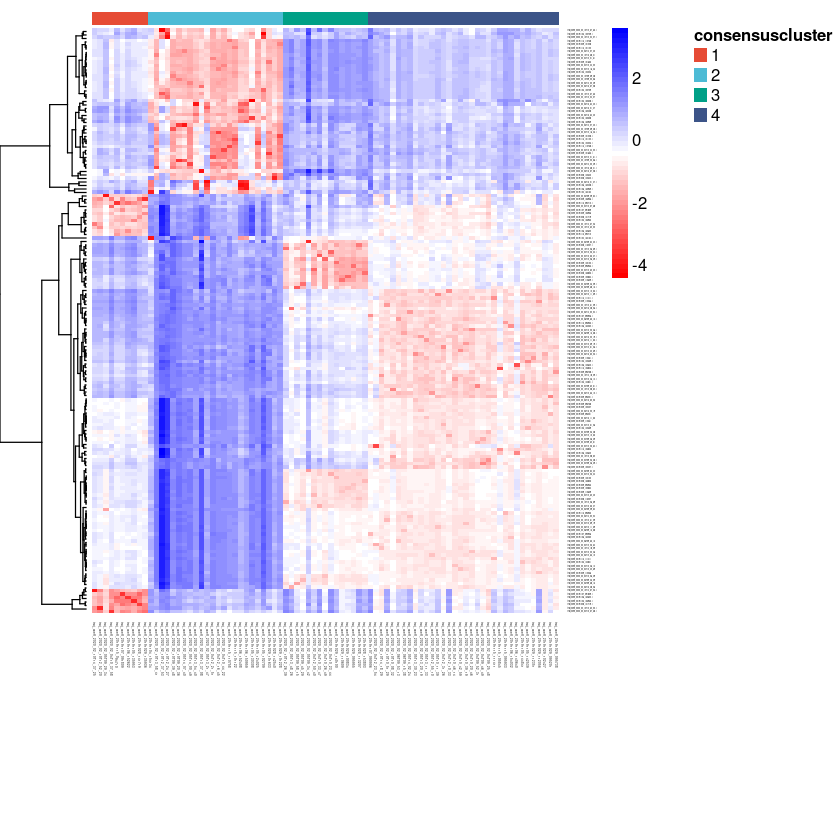

In [6]:
data <- res$realdataresults[[myK]]$ordered_data
annon <- res$realdataresults[[myK]]$ordered_annotation
ccmatrix <- res$realdataresults[[myK]]$consensus_matrix

data <- t(scale(t(data)))
data <- apply(data, 2, function(x) ifelse(x > 4, 4, x))
data <- apply(data, 2, function(x) ifelse(x < -4, -4, x))      
              
              
ann_colors <- ggsci::pal_npg()(myK)
ann_colors2 <- ggsci::pal_npg()(myK)

# for saving uncomment the line before and after the plotting code
#svg(filename="figures/Heatmap_M3C_sorted_all.svg")
NMF::aheatmap(data, annCol = annon, scale = 'row', Colv = NA, distfun = 'pearson',
              color = gplots::redblue(256), annColors = list(class=ann_colors, consensuscluster=ann_colors2))
#dev.off()  

In [7]:
#write.csv(data,"results/M3C/simMeasures/res_all_data_K4.csv")
#write.csv(annon,"results/M3C/simMeasures/res_all_annon_K4.csv")
#write.csv(ccmatrix,"results/M3C/simMeasures/res_all_ccmatrix_K4.csv")